In [10]:
import os
os.chdir("D:\SEM - 6\Machine Learning\Viswanathan")

In [52]:
"""
Author: Thirunavukkarasu J
Reg no: 19BDS0146
Vellore University of Technology, Vellore
Course Title: Machine Learning
"""

'\nAuthor: Thirunavukkarasu J\nReg no: 19BDS0146\nVellore University of Technology, Vellore\nCourse Title: Machine Learning\n'

#### Importing the required libraries

In [53]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as mtp  
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

#### Loading the file 

In [54]:
df = pd.read_csv("ndata.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### Dropping columns – ‘id’ and ‘Unnamed: 32’ as they have no role in prediction

In [55]:
df = df.drop(["Unnamed: 32","id"], axis=1)

#### Converting the diagnosis value of M and B to a numerical value where M (Malignant) = 1 and B (Benign) = 0

In [56]:
df.diagnosis.replace(['M', 'B'], [1, 0], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


#### Finding the null values in the dataset

In [28]:
df.isnull().sum().sum()

0

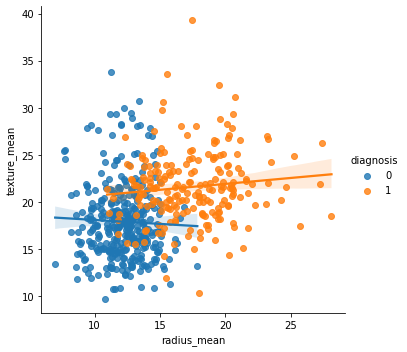

In [29]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

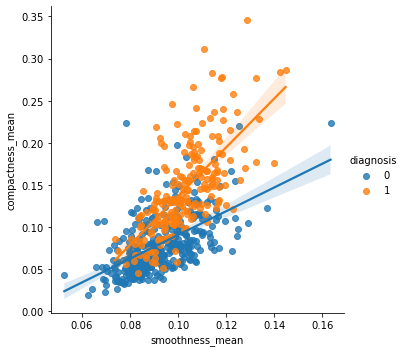

In [30]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',
		data = df, hue = 'diagnosis')

#### Splitting data to Input and Output data

In [31]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

#### Splitting data to training and testing

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size = 0.33, random_state = 42)

#### Model fitting Using Sklearn

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 13).fit(X_train, y_train)

#### Prediction

In [43]:
ypred = knn.predict(X_test)

In [48]:
i = 0
print ("\n-------------------------------------------------------------------------")
print ('%-25s %-25s %-25s' % ('Original Label', 'Predicted Label', 'Correct/Wrong'))
print ("-------------------------------------------------------------------------")
for label in y_test:
    print ('%-25s %-25s' % (label, ypred[i]), end="")
    if (label == ypred[i]):
        print (' %-25s' % ('Correct'))
    else:
        print (' %-25s' % ('Wrong'))
i = i + 1
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(y_test, ypred))
print ("-------------------------------------------------------------------------")
print("\nClassification Report:\n",metrics.classification_report(y_test, ypred))
print ("-------------------------------------------------------------------------")
print('Accuracy of the classifer is %0.2f' % metrics.accuracy_score(y_test,ypred))
print ("-------------------------------------------------------------------------")


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
0                         0                         Correct                  
1                         0                         Wrong                    
1                         0                         Wrong                    
0                         0                         Correct                  
0                         0                         Correct                  
1                         0                         Wrong                    
1                         0                         Wrong                    
1                         0                         Wrong                    
0                         0                         Correct                  
0                         0                         Correct            

#### Prediction Score

In [42]:
knn.score(X_test, y_test)

0.9627659574468085

#### Cross Validation

In [49]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
	neighbors.append(k)
	knn = KNeighborsClassifier(n_neighbors = k)
	scores = cross_val_score(
		knn, X_train, y_train, cv = 10, scoring = 'accuracy')
	cv_scores.append(scores.mean())


#### Misclassification error versus k

The optimal number of neighbors is  13 


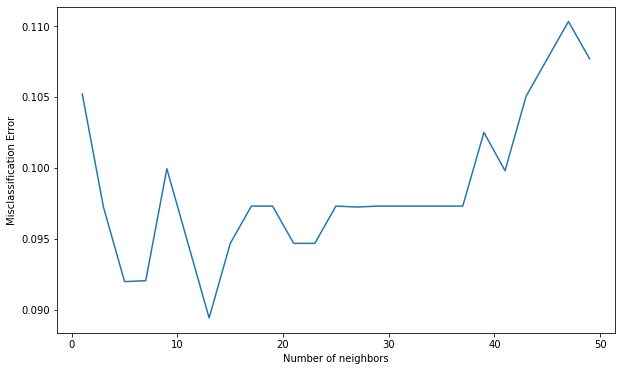

In [50]:
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()


#### Conclusion

The implementation was investigated on different distance measures and classification rules and the metrics are recorded. Evidently, the best results were obtained as 96.28% employing Euclidean distance. For larger datasets, the running time of the KNN Algorithm can be high. Prediction of malignant tumour in the very early stages can be done directly on the mammography images with high degree of accuracy using deep learning techniques.